<a href="https://colab.research.google.com/github/srimathi-del/Delaney-processed-compounds-sri/blob/main/Copy_of_QSAR_model_with_random_forest_regressor_algorithm_for_Molecules_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rdkit-pypi

In [3]:
!pip install scikit-learn

In [4]:
!pip install pandas

In [5]:
!pip install --upgrade numpy pandas scikit-learn rdkit matplotlib

In [6]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [7]:
data = {
    'SMILES': ['N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c1ccccc1', 'Cc1occc1C(=O)Nc2ccccc2', 'CC(C)=CCCC(C)=CC(=O)', 'c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43', 'c1ccsc1'],
    'activity':  [2.306,2.995 ,3.486 ,5.261 ,2.372]
}
df = pd.DataFrame(data)

df = pd.DataFrame(data)

In [8]:
# df = pd.read_csv('/content//content/drive/MyDrive/Colab Notebooks/cheminfo project drug properties/delaney-processed compound -1 set (ADMET analysis).csv

In [9]:
descriptor_list = []
# Extract 'SMILES' column from the DataFrame into a list
# called smiles_data
smiles_data = df['SMILES'].tolist()
for smiles in smiles_data:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
      mol_weight = Descriptors.MolWt(mol)
      LogP = Descriptors.MolLogP(mol)
      Num_h_donors = Descriptors.NumHDonors(mol)
      Num_h_acceptors = Descriptors.NumHAcceptors(mol)
      descriptor_list.append([mol_weight, LogP, Num_h_donors, Num_h_acceptors])



In [10]:
df=pd.DataFrame(descriptor_list, columns=['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors'])
df['Activity'] = data['activity'] # Changed 'Activity' to 'activity' to match the key in the data dictionary

In [11]:
X = df.drop(columns=['Activity'])
y = df['Activity']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [15]:
if np.var(y_test) != 0:  # Check if variance is not 0
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2:.3f}")
else:
    print("R² is undefined because y_test has no variance.")
    r2 = None  # Assign None to r2 if variance is 0

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.3f}')


R² is undefined because y_test has no variance.
RMSE: 0.339


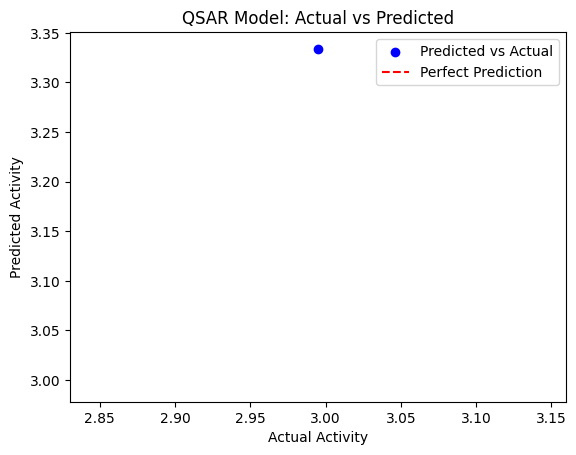

In [16]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Activity')
plt.ylabel('Predicted Activity')
plt.title('QSAR Model: Actual vs Predicted')
plt.legend()
plt.show()